In [1]:
# import and look at pictures
# read and show inline a picture

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import math
import statistics

%matplotlib inline

In [2]:
# Get all the training images, which are in another main folder
# Combine the training images into two main sets: one for non-vehicles and the other for vehicles
# Here we deal with the non-vehicle set
nv_img_set1 = glob.glob('../Vehicles_Sets/non_vehicles/Extras/*.png')
nv_img_set2 = glob.glob('../Vehicles_Sets/non_vehicles/GTI/*.png')

nv_img_set = []
nv_img_set.extend(nv_img_set1)
nv_img_set.extend(nv_img_set2)

print('# of images in non-vehicle training set is: ({} + {}) = {}'.format(len(nv_img_set1), len(nv_img_set2), len(nv_img_set)))
print(nv_img_set[0])

# of images in non-vehicle training set is: (5068 + 3900) = 8968
../Vehicles_Sets/non_vehicles/Extras/extra1.png


In [3]:
# Get all the training images, which are in another main folder
# Combine the training images into two main sets: one for non-vehicles and the other for vehicles
# Here we deal with the vehicle set
v_img_set1 = glob.glob('../Vehicles_Sets/vehicles/GTI_Far/*.png')
v_img_set2 = glob.glob('../Vehicles_Sets/vehicles/GTI_Left/*.png')
v_img_set3 = glob.glob('../Vehicles_Sets/vehicles/GTI_MiddleClose/*.png')
v_img_set4 = glob.glob('../Vehicles_Sets/vehicles/GTI_Right/*.png')
v_img_set5 = glob.glob('../Vehicles_Sets/vehicles/KITTI_extracted/*.png')


v_img_set = []
v_img_set.extend(v_img_set1)
v_img_set.extend(v_img_set2)
v_img_set.extend(v_img_set3)
v_img_set.extend(v_img_set4)
v_img_set.extend(v_img_set5)

print('# of images in vehicle training set is: ({} + {} + {} + {} + {}) = {}'.format(len(v_img_set1), len(v_img_set2), len(v_img_set3), len(v_img_set4), len(v_img_set5), len(v_img_set)))
print('Example of image file path: {}'.format(v_img_set[64]))

# of images in vehicle training set is: (834 + 909 + 419 + 664 + 5966) = 8792
Example of image file path: ../Vehicles_Sets/vehicles/GTI_Far/image0115.png


In [4]:
# Combine our image sets (of cars and non cars)
total_img_set_path = list(v_img_set)
total_img_set_path.extend(nv_img_set)
# Create labels for our image sets (ones for images with a car and zeros for images with no car)
y = np.hstack((np.ones(len(v_img_set)), 
              np.zeros(len(nv_img_set))))
print('y labels at junction between cars and non-cars sets: {}'.format(y[8790:8796]))
print('Total number of pictures (carns and non-cars){}'.format(len(total_img_set_path)))

y labels at junction between cars and non-cars sets: [ 1.  1.  0.  0.  0.  0.]
Total number of pictures (carns and non-cars)17760


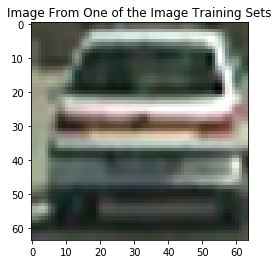

In [5]:
# Read one of the images using OpenCV
img_BGR = cv2.imread('../Vehicles_Sets/vehicles/GTI_Far/image0307.png')
img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Image From One of the Image Training Sets')
plt.show()

In [6]:
# Showing the RGB number arrays making up the picture
print('RGB values of top 2 left pixels in image: {}'.format(img[0][:2]))

RGB values of top 2 left pixels in image: [[69 72 53]
 [69 72 53]]


In [7]:
#### Converting an image to HLS color space to look at picture in more details
def apply_hls(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hue_img = hls[:,:,0]
    light_img = hls[:,:,1]
    sat_img = hls[:,:,2]
    
    return (hue_img, light_img, sat_img)

In [8]:
res_img = apply_hls(img)

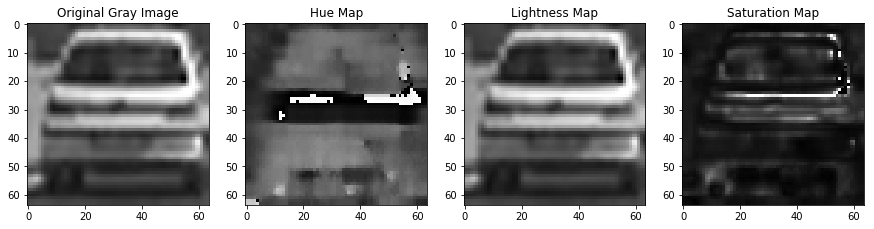

In [9]:
img_gr = cv2.cvtColor(img_BGR, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,10))

ax1.set_title('Original Gray Image')
ax1.imshow(img_gr, cmap = 'gray')

ax2.set_title('Hue Map')
ax2.imshow(res_img[0], cmap = 'gray')

ax3.set_title('Lightness Map')
ax3.imshow(res_img[1], cmap = 'gray')

ax4.set_title('Saturation Map')
ax4.imshow(res_img[2], cmap = 'gray')


plt.show()

In [10]:
# extract the Histogram of Oriented Gradient from a picture
from skimage.feature import hog

# Parameters used for our Histogram of Oriented Gradient
pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = hog(img_gr, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)

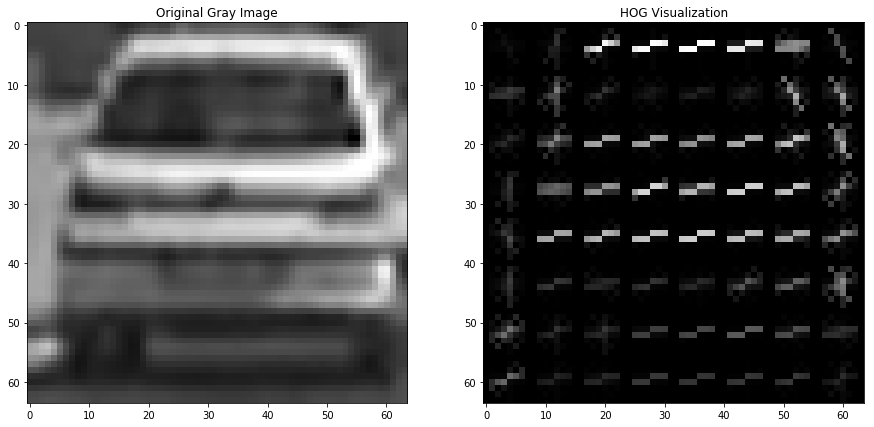

In [11]:
# Comparing the gray image input with the HOG visualization
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))

ax1.set_title('Original Gray Image')
ax1.imshow(img_gr, cmap = 'gray')

ax2.set_title('HOG Visualization')
ax2.imshow(hog_image, cmap = 'gray')

plt.show()

In [12]:
print('Shape of HOG features for the image above'.format(features.shape))
new = features.ravel()
print('Total number of HOG features for the image above'.format(len(new)))

Shape of HOG features for the image above
Total number of HOG features for the image above


In [13]:
# Define a function to return HOG features and visualization
# When visualization (vis) parameter is True then both the feature set and a HOG visualization are returned
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=False, feature_vector=False)
        return features

In [14]:
# Now we need to take all our paths to our images, read them and get their HOG features 
# and save the results in a new list called total_img_set
total_img_set = []

# Parameters used for our Histogram of Oriented Gradient
pix_per_cell = 8
cell_per_block = 2
orient = 9

for img_path in total_img_set_path:
    img_BGR = cv2.imread(img_path)
    img_gr = cv2.cvtColor(img_BGR, cv2.COLOR_RGB2GRAY)
    hog_features =  get_hog_features(img_gr, orient, pix_per_cell, cell_per_block)
    # now we have to 'flatten' the array of hog features
    flat_array = hog_features.ravel()
    total_img_set.append(flat_array)

In [15]:
print('Image set contains a total of: {} pictures'.format(len(total_img_set)))
print('Number of HOG features for one of the pictures from the image set: {}'.format(total_img_set[0].shape))

Image set contains a total of: 17760 pictures
Number of HOG features for one of the pictures from the image set: (1764,)


In [16]:
# Importing train_test_split to split our picture set into a training and testting set
# Old version of sklearn: from sklearn.cross_validation import train_test_split
# But, if you are using scikit-learn >= 0.18 then use this:
from sklearn.model_selection import train_test_split

In [17]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
# Force the random state to a certain value (to enable us to measure impact of code changes below)
rand_state = 99
X_train, X_test, y_train, y_test = train_test_split(total_img_set, y, test_size=0.97, random_state=rand_state)

In [18]:
print('Number of training values: {} ({} labels)'.format(len(X_train), len(y_train)))
print('Number of training values: {} ({} labels)'.format(len(X_test), len(y_test)))

Number of training values: 532 (532 labels)
Number of training values: 17228 (17228 labels)


In [19]:
# Now we're going to find the best SVM model to split our cars and non-cars sets
# This is done by using GridSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10], 'gamma':[0.001, 0.01, 0.1]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [20]:
print('The best SVC parameters found by GridSearchCV are: {}'.format(clf.best_params_))

The best SVC parameters found by GridSearchCV are: {'C': 10, 'gamma': 0.1}


In [21]:
print('Test Accuracy of SVC = ', clf.score(X_test, y_test))

Test Accuracy of SVC =  0.952867425122


In [22]:
print('Prediction Examples:')
print('\nMy SVC predicts: ', clf.predict(X_test[0:18]))
print('For labels:      ', y_test[0:18])

Prediction Examples:

My SVC predicts:  [ 1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.]
For labels:       [ 1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.]


In [23]:
# Now that we know what parameters are the best we can use them to retrain the Support Vector Machine
# but this time with more training data. This way we should get a better fit

# First, we split up data into randomized training and test sets, but with a bigger size of training set
rand_state = np.random.randint(0, 100)
# Force the random state to a certain value (to enable us to measure impact of code changes below)
rand_state = 99

X_train, X_test, y_train, y_test = train_test_split(total_img_set, y, test_size=0.2, random_state=rand_state)

# Second, we fit the SVC to the training set, but using the best parameters we found using gridSearchCV
clf = svm.SVC(C = 10.0, gamma = 0.1)
clf.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
print('Test Accuracy of SVC is now: ', clf.score(X_test, y_test))

Test Accuracy of SVC is now:  0.989864864865


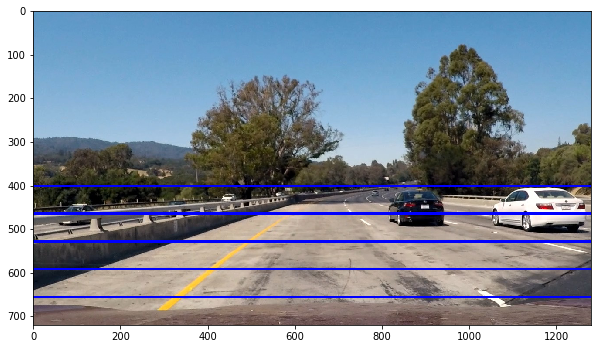

In [25]:
# Read actual dashcam picture and superimpose lines that are 64 pixels appart
# This is to give us an idea of the space that needs to be scanned for cars
img = mpimg.imread('./test_images/test1.jpg')

f, (ax1) = plt.subplots(1,1, figsize=(10,10))
cv2.line(img, (0,400), (1280,400), (0, 0, 255), 4)
cv2.line(img, (0,464), (1280,464), (0, 0, 255), 4)
cv2.line(img, (0,528), (1280,528), (0, 0, 255), 4)
cv2.line(img, (0,592), (1280,592), (0, 0, 255), 4)
cv2.line(img, (0,656), (1280,656), (0, 0, 255), 4)
ax1.imshow(img)
plt.show()

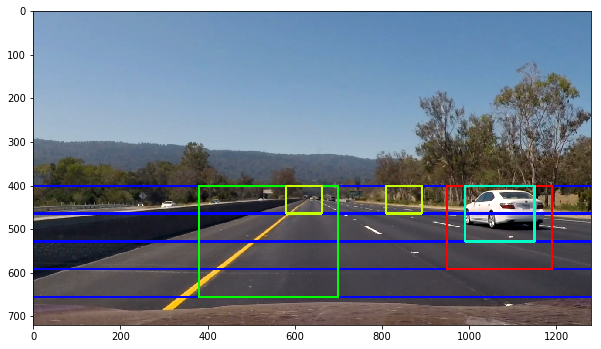

In [26]:
# Now try to find the various drawing rectangle sizes we need to use to capture a car
img = mpimg.imread('./test_images/test10.jpg')

f, (ax1) = plt.subplots(1,1, figsize=(10,10))
cv2.line(img, (0,400), (1280,400), (0, 0, 255), 4)
cv2.line(img, (0,464), (1280,464), (0, 0, 255), 4)
cv2.line(img, (0,528), (1280,528), (0, 0, 255), 4)
cv2.line(img, (0,592), (1280,592), (0, 0, 255), 4)
cv2.line(img, (0,656), (1280,656), (0, 0, 255), 4)

cv2.rectangle(img, (380, 656), (700, 400), (0, 255, 0), 4)
cv2.rectangle(img, (950, 592), (1190, 400), (255, 0, 0), 4)
cv2.rectangle(img, (820+170, 528), (980+170, 400), (0, 255, 200), 4)
cv2.rectangle(img, (810, 464), (874+18, 400), (200, 255, 0), 4)
cv2.rectangle(img, (580, 464), (644+18, 400), (200, 255, 0), 4)

ax1.imshow(img)
plt.show()

# bboxes = [((x1, y1), (x2, y2)), ((,),(,)), ...]

In [27]:
# Show all the windows drawn
rect_1 = [336, 256]
rect_2 = [252, 192]
rect_3 = [168, 128]
rect_4 = [84, 64]

In [28]:
# function to draw windows on image
def rect_draw(img, add_width, add_height, stride, color):
    width = add_width
    counter = 0
    
    btm_left_x = 524-504 # Starting the rectangles close to the left edge of the picture
    btm_left_y = 400 + add_height
    top_right_x = btm_left_x + width
    top_right_y = 400
    
    while top_right_x <= 1280:   # the image used is 1280 pixels wide
        cv2.rectangle(img, (btm_left_x, btm_left_y), (top_right_x, top_right_y), color, 2)
        btm_left_x += stride
        top_right_x = btm_left_x + width
        counter += 1
    print("Total number of rectangles drawn: {}. Last top x: {}".format(counter, top_right_x))

Total number of rectangles drawn: 57. Last top x: 1301
Total number of rectangles drawn: 27. Last top x: 1322
Total number of rectangles drawn: 17. Last top x: 1343
Total number of rectangles drawn: 12. Last top x: 1364


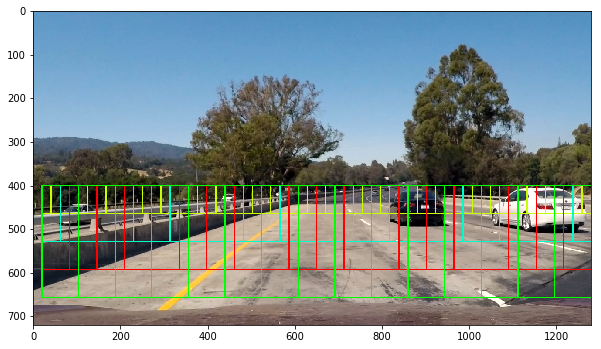

In [30]:
# Read actual dashcam picture
img = mpimg.imread('./test_images/test1.jpg')

f, (ax1) = plt.subplots(1,1, figsize=(10,10))
rect_draw(img, rect_4[0], rect_4[1], int(rect_4[0]/4.0), (200, 255, 0))
rect_draw(img, rect_3[0], rect_3[1], int(rect_3[0]/4.0), (0, 255, 200))
rect_draw(img, rect_2[0], rect_2[1], int(rect_2[0]/4.0), (255, 0, 0))
rect_draw(img, rect_1[0], rect_1[1], int(rect_1[0]/4.0), (0, 255, 0))

ax1.imshow(img)
plt.show()

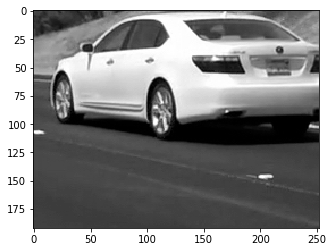

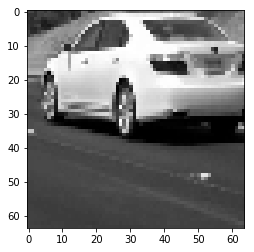

In [31]:
# Read an image. Transform it to gray. Resize it to 64x64 (using cv2.INTER_NEAREST)
# Apply HOG. Use the model to predict whether it's a car or not
img = cv2.imread('./test_images/car1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
res_gray = cv2.resize(gray,(64, 64), interpolation = cv2.INTER_LINEAR)
# res_gray = cv2.resize(gray,(64, 64), interpolation = cv2.INTER_NEAREST)

plt.imshow(gray, cmap='gray')
plt.show()
plt.imshow(res_gray, cmap = 'gray')
plt.show()

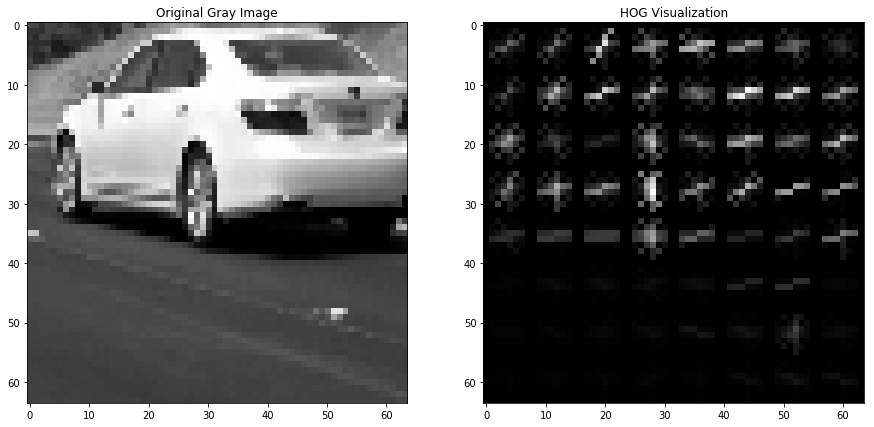

In [32]:
# Parameters used for our Histogram of Oriented Gradient
pix_per_cell = 8
cell_per_block = 2
orient = 9

hog_features, visualization =  get_hog_features(res_gray, orient, pix_per_cell, cell_per_block, vis=True)
# now we have to 'flatten' the array of hog features
flat_array = hog_features.ravel()


f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))

ax1.set_title('Original Gray Image')
ax1.imshow(res_gray, cmap = 'gray')

ax2.set_title('HOG Visualization')
ax2.imshow(visualization, cmap = 'gray')

plt.show()

In [33]:
print('My SVC predicts: ', clf.predict([flat_array]))

My SVC predicts:  [ 0.]


In [34]:
# Now start with a full dashcam picutre and crop it to only keep the region of interest
img_BGR = cv2.imread('./test_images/test1.jpg')

In [35]:
#### Take a full-size image, crop it to the region of interest and make it gray
def crop_pic(img_BGR):
    gray_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
    crop_img = gray_img[400:656, 524:1280]
    
    return crop_img

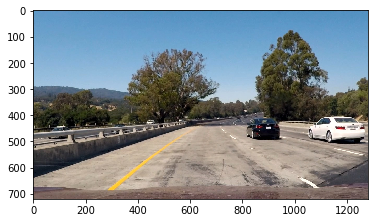

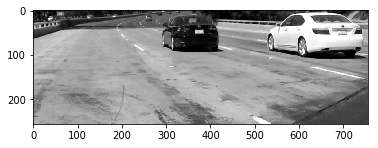

In [36]:
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

gray = crop_pic(img_BGR)
plt.imshow(gray, cmap = 'gray')
plt.show()

In [37]:
# Show all the windows drawn
rect_1 = [336, 256]
rect_2 = [252, 192]
rect_3 = [168, 128]
rect_0 = [126,96]
rect_4 = [84, 64]

In [38]:
#### function to get the positions of all the rectangles to analyze
def select_rects(img, start_width, start_height, add_width, add_height, stride):
    width = add_width
    height = add_height
    rects = []
    
    top_right_y = start_height
    btm_left_y = start_height + height
    
    btm_left_x = start_width
    top_right_x = start_width + width
    
    while top_right_x <= img.shape[1]:   # the image used is 1280 pixels wide
        rect = [btm_left_x, btm_left_y, top_right_x, top_right_y]
        rects.append(rect)
        btm_left_x += stride
        top_right_x = btm_left_x + width
    return rects

In [39]:
#### Crop an image to a rectangle with specified dimensions. Resize it to 64x64
def crop_rect(gray_img, start_height, end_height, start_width, end_width):
    crop = gray_img[start_height:end_height, start_width:end_width]
    res_img = cv2.resize(crop,(64, 64), interpolation = cv2.INTER_LINEAR)
    
    return res_img

In [40]:
#### Analyze rectangles from the cropped image
def analyze_rects(gray_img):
    global frame_count
    
    start_pt = 524
    
    all_rects = []
    activated_rects = []
    pix_per_cell = 8
    cell_per_block = 2
    orient = 9
    
    counter = 0
    
    if frame_count < 100:
        start_pt = 524
    elif frame_count < 210:
        start_pt = 524 - 64
    elif frame_count < 300:
        start_pt = 524 - 128
    elif frame_count < 550:
        start_pt = 524 - 192
    else:
        start_pt = 524-256
        
    xsmall_rects = select_rects(gray_img, start_pt, 0, rect_4[0], rect_4[1], int(rect_4[0]/4.0))
    xsmall_rects_2 = select_rects(gray_img, start_pt, 32, rect_4[0], rect_4[1], int(rect_4[0]/4.0))
    small_rects = select_rects(gray_img, 252, 0, rect_3[0], rect_3[1], int(rect_3[0]/4.0))
    small_rects_2 = select_rects(gray_img, 252, 32, rect_3[0], rect_3[1], int(rect_3[0]/4.0))
    med_rects = select_rects(gray_img, 252, 0, rect_0[0], rect_0[1], int(rect_0[0]/3.0))
    large_rects = select_rects(gray_img, 252, 0, rect_2[0], rect_2[1], int(rect_2[0]/4.0))
    #xlarge_rects = select_rects(gray_img, 0, 84, rect_1[0], rect_1[1], int(rect_1[0]/4.0))
    
    all_rects.extend(xsmall_rects)
    all_rects.extend(xsmall_rects_2)
    all_rects.extend(small_rects)
    all_rects.extend(small_rects_2)
    all_rects.extend(med_rects)
    all_rects.extend(large_rects)
    #all_rects.extend(xlarge_rects)
    
    for rect in all_rects:
        counter += 1
        #print('Rect is ', rect)
        res_img = crop_rect(gray_img, rect[3], rect[1], rect[0], rect[2])            
        # Get the HOG features of the resized rectangle
        hog_features =  get_hog_features(res_img, orient, pix_per_cell, cell_per_block)
        # Now we need to 'flatten' the array of hog features
        flat_array = hog_features.ravel()
        # Use SVM model to predict whether the rectangle shows a car or not, and keep its position if it does
        result = clf.predict([flat_array])
        
        if result > 0. :
            # The code below is useful to see individual rectangles where the model recognized a car
            #print('a car was found in the following rectangle {} at counter position {}'.format(rect, counter))
            #plt.imshow(res_img, cmap = 'gray')
            #plt.show()
            activated_rects.append(rect)
            
    
    return activated_rects

In [216]:
frame_count = 0
prev_bboxes = []

In [83]:
# Analyze the gray cropped image
analysis_1 = analyze_rects(gray)

In [84]:
print('Number of rectangles with a possible car: {}'.format(len(analysis_1)))

Number of rectangles with a possible car: 19


In [85]:
print('Coordinates of rectangles with a possible car:\n{}'.format(analysis_1))

Coordinates of rectangles with a possible car:
[[545, 64, 629, 0], [566, 64, 650, 0], [608, 64, 692, 0], [629, 64, 713, 0], [524, 96, 608, 32], [545, 96, 629, 32], [671, 96, 755, 32], [252, 128, 420, 0], [294, 128, 462, 0], [504, 128, 672, 0], [546, 128, 714, 0], [588, 128, 756, 0], [294, 96, 420, 0], [504, 96, 630, 0], [546, 96, 672, 0], [588, 96, 714, 0], [630, 96, 756, 0], [252, 192, 504, 0], [504, 192, 756, 0]]


In [203]:
#### Full pipeline: find and draw rectangles around cars in an image
def find_cars(full_size_img):
    #RGB_img = cv2.cvtColor(full_size_img, cv2.COLOR_BGR2RGB)
    RGB_img = full_size_img
    # img provided was read by cv2.imread so it is BGR
    bboxes = []
    
    
    # Crop the image to area where cars are (this returns a gray cropped image)
    # Origin of cropping: y: 400, x: 524
    cropped_img  = crop_pic(full_size_img)
    
    # Get a list of positions of rectangles with possible car in them
    candidate_rects = analyze_rects(cropped_img)
    
    ## #f, (ax1) = plt.subplots(1,1, figsize=(15,10))
    
    for rect in candidate_rects:
        # The line below is if we want to display rectangle on the original image
        ## #cv2.rectangle(RGB_img, (rect[0]+524, rect[1]+400), (rect[2]+524, rect[3]+400), (0, 125, 255), 2)
        btm_l_array = np.array([rect[0]+524, rect[1]+400])
        top_r_array = np.array([rect[2]+524, rect[3]+400])
        box_array = np.array([btm_l_array, top_r_array])
        bboxes.append(box_array)
    ## #f, (ax1) = plt.subplots(1,1, figsize=(15,10))
    ## #cv2.rectangle(img, (950, 592), (1190, 400), (255, 0, 0), 4)
        
    ## #ax1.imshow(RGB_img)
    print('def find_cars() bboxes is of type {} with first value {} of type {}'.format(type(bboxes), bboxes[0], type(bboxes[0])))
    return bboxes


In [87]:
img_f = cv2.imread('./test_images/test1.jpg')
first_img = find_cars(img_f)

In [88]:
print('Coordinates of bounding boxes found in the picture:')
for i in first_img:
    print('[{}  {}]'.format(i[0], i[1]))

Coordinates of bounding boxes found in the picture:
[[1069  464]  [1153  400]]
[[1090  464]  [1174  400]]
[[1132  464]  [1216  400]]
[[1153  464]  [1237  400]]
[[1048  496]  [1132  432]]
[[1069  496]  [1153  432]]
[[1195  496]  [1279  432]]
[[776 528]  [944 400]]
[[818 528]  [986 400]]
[[1028  528]  [1196  400]]
[[1070  528]  [1238  400]]
[[1112  528]  [1280  400]]
[[818 496]  [944 400]]
[[1028  496]  [1154  400]]
[[1070  496]  [1196  400]]
[[1112  496]  [1238  400]]
[[1154  496]  [1280  400]]
[[776 592]  [1028  400]]
[[1028  592]  [1280  400]]


In [89]:
img_f = cv2.imread('./test_images/test2.jpg')
second_img = find_cars(img_f)
print('Number of bounding boxes in test2.jpg (image with no visible cars): {}'.format(len(second_img)))

Number of bounding boxes in test2.jpg (image with no visible cars): 0


In [90]:
img_f = cv2.imread('./test_images/test6.jpg')
six_img = find_cars(img_f)
print('Number of bounding boxes in test6.jpg: {}'.format(len(six_img)))

Number of bounding boxes in test6.jpg: 14


In [91]:
# Now trying to use the bounding boxes found in the image to create a heatmap
heatmap = np.zeros_like(img_f)
# transform heatmap into an image with only one channel (easier to manipulate)
heatmap = cv2.cvtColor (heatmap, cv2.COLOR_RGB2GRAY)

print('img_f shape is {}'.format(img_f.shape))
print('heatmap shape is {}'.format(heatmap.shape))

img_f shape is (720, 1280, 3)
heatmap shape is (720, 1280)


In [197]:
import copy
def add_heat(heatmap, bbox_list):
    global prev_bboxes
    global frame_count
    
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 10 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        # heatmap[y_low:y_high, x_low:x_high, rgb_channel_number] += 1
        heatmap[box[1][1]:box[0][1], box[0][0]:box[1][0]] += 1
    
    """    
    if len(prev_bboxes) == 1:
        for box in prev_bboxes:
            heatmap[box[1][1]:box[0][1], box[0][0]:box[1][0]] += 1
            print('frame is {} and previous box is of type {} and  {}'.format(frame_count, type(prev_bboxes),prev_bboxes))
    elif len(prev_bboxes) > 1:
        print('frame is {} and previous box is of type {} and  {}'.format(frame_count, type(prev_bboxes),prev_bboxes))
        for prev_recs in prev_bboxes:
            for box in prev_recs:
                heatmap[box[1][1]:box[0][1], box[0][0]:box[1][0]] += 1
    
    # Only keep the boxes from the previous frame
    # prev_bboxes = prev_bboxes[-1]
    """
    
    return heatmap

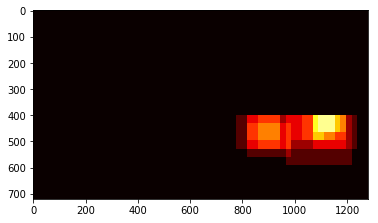

In [93]:
new_heat = add_heat(heatmap, six_img)
plt.imshow(new_heat, cmap = 'hot')
plt.show()

In [176]:
# We want to apply a threshold to get rid of false positives (i.e. portion of road recognized as car)
# There should be less bounding boxes center on false positives, hence we get rid of all regions that 
# have less than the threshold parameter below
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [95]:
# label helps us to find out the number of unique cars in a picture based on our results from apply_threshold()
from scipy.ndimage.measurements import label

3 cars found


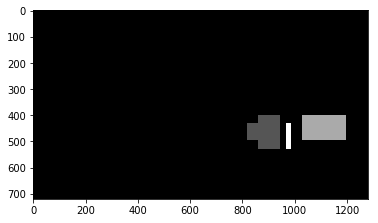

In [96]:
heatmap = apply_threshold(new_heat, 3)
labels = label(heatmap)
print(labels[1], 'cars found')
plt.imshow(labels[0], cmap = 'gray')
plt.show()

In [97]:
print(labels[0].shape)

(720, 1280)


In [215]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

def draw_labeled_bboxes(img, labels):
    global frame_count
    global prev_bboxes
    
    final_img_boxes = []
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        
        btm_l_array = np.array([np.min(nonzerox), np.min(nonzeroy)])
        top_r_array = np.array([np.max(nonzerox), np.max(nonzeroy)])
        box_array = np.array([btm_l_array, top_r_array])
        
        # Append these boxes to a list that we will use for the next frame
        final_img_boxes.append(box_array)
        
        # only keep the last two frame records
        # prev_bboxes = prev_bboxes[-2:]
        #print("2: draw_labeled_bboxes() prev_bboxes is now of type {} and {}".format(type(final_img_boxes), final_img_boxes))
    
    print("draw_labeled_bboxes() final_img_boxes is now of type {} and length {} with first value {} of type {}".format(type(final_img_boxes), len(final_img_boxes), final_img_boxes[0], type(final_img_boxes[0])))
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,"Frame: {}".format(frame_count) ,(20,35), font, 1,(255,255,255),2)
        #frame_count += 1
    # Return the image
    return img

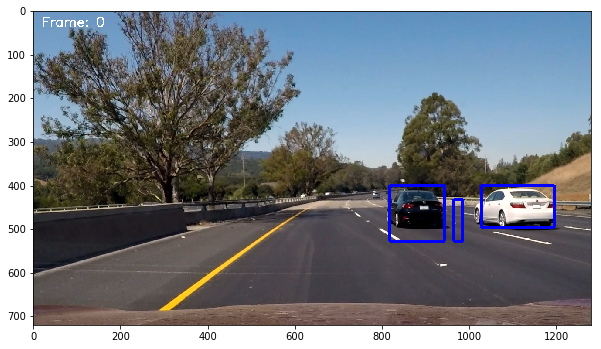

In [99]:
# Read in the last image above for which we found the labels
image = mpimg.imread('./test_images/test6.jpg')
# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image), labels)

# Display the image
f, (ax) = plt.subplots(1,1, figsize=(10,10))
ax.imshow(draw_img)
plt.show()


In [177]:
print(prev_bboxes)

[]


In [198]:
#### This function combines all the other functions used to undistort and unwarp image; 
#### find lane lines, curvature and distance from center; and draw these findings back 
#### on the original image
def process_image(img_feed):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    #global glob_curvatures
    #global glob_curvature
    #global glob_dist_ctr
    global frame_count
    
    bboxes = []
    
    # make a copy of the image
    new_img = np.copy(img_feed)
    
    # find_cars() takes a full-size color image, turns it to gray, crop it
    # Get a list of positions of rectangles with possible car in them
    # Return the list of rectangles (bounding boxes), with their coordinates in the full-size image
    bboxes = find_cars(new_img)
    

    # Create an image with only 0s as values but the same shape as our full-size image
    # We will use this image as canvas for the bounding boxes found in the image to create a heatmap
    heatmap = np.zeros_like(img_feed)
    # transform heatmap into an image with only one channel (easier to manipulate)
    heatmap = cv2.cvtColor (heatmap, cv2.COLOR_RGB2GRAY)
    
    # Update our heatmap with the list of bounding boxes found in the image
    current_heatmap = add_heat(heatmap, bboxes)
    # add_heat() returns a one-channel image with pixels values higher where more than one bounding box
    # encompassed that pixel
    
    threshold = 3
    
    # apply_threshold() will turn back to 0 all the pixels whose value is below the threshold 
    # because these pixels might be false positives (i.e. model predicted a car in a box where there was none)
    currated_heatmap = apply_threshold(current_heatmap, threshold)
    # The label() function looks at a heatmap and determines how many unique elements are on it
    labels = label(currated_heatmap)
    
    # draw_labeled_bboxes() takes our initial images and draws bounding boxes on it based
    # on the information in labels
    final_img = draw_labeled_bboxes(img_feed, labels)
    frame_count += 1
    
    return final_img

In [163]:
def line_image(img_feed):
    global frame_count
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    img = np.copy(img_feed)

    cv2.line(img, (0,400), (1280,400), (0, 0, 255), 4)
    cv2.line(img, (0,432), (1280,432), (0, 255, 0), 4)
    cv2.line(img, (0,464), (1280,464), (0, 0, 255), 4)
    cv2.line(img, (0,496), (1280,496), (0, 255, 0), 4)
    cv2.line(img, (0,528), (1280,528), (0, 0, 255), 4)
    cv2.line(img, (0,592), (1280,592), (0, 0, 255), 4)
    
    cv2.line(img, (776,0), (776,720), (255, 0, 0), 4)
    cv2.line(img, (839,0), (839,720), (255, 0, 0), 4)
    cv2.line(img, (902,0), (902,720), (255, 0, 0), 4)
    cv2.line(img, (965,0), (965,720), (255, 0, 0), 4)
    cv2.line(img, (1028,0), (1028,720), (255, 0, 0), 4)
    
    cv2.putText(img,"Frame: {}".format(frame_count) ,(20,35), font, 1,(255,255,255),2)
    #frame_count += 1
    
    #cv2.line(img, (0,656), (1280,656), (0, 0, 255), 4)
    return img

In [164]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [217]:
white_output = 'trialx8.mp4'
clip1 = VideoFileClip("test_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 3 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>
[MoviePy] >>>> Building video trialx8.mp4
[MoviePy] Writing video trialx8.mp4






  0%|          | 0/39 [00:00<?, ?it/s]



  3%|▎         | 1/39 [00:00<00:12,  2.96it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 1 with first value [[ 818  400]
 [1195  559]] of type <class 'numpy.ndarray'>






  5%|▌         | 2/39 [00:00<00:13,  2.79it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






  8%|▊         | 3/39 [00:01<00:13,  2.76it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 10%|█         | 4/39 [00:01<00:12,  2.80it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 13%|█▎        | 5/39 [00:01<00:11,  2.88it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 1 with first value [[ 818  400]
 [1195  559]] of type <class 'numpy.ndarray'>






 15%|█▌        | 6/39 [00:02<00:11,  2.86it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[1028  400]
 [1195  495]] of type <class 'numpy.ndarray'>






 18%|█▊        | 7/39 [00:02<00:11,  2.86it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 21%|██        | 8/39 [00:02<00:10,  2.83it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 23%|██▎       | 9/39 [00:03<00:10,  2.84it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[1048  400]
 [1195  495]] of type <class 'numpy.ndarray'>






 26%|██▌       | 10/39 [00:03<00:10,  2.87it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[860 400]
 [943 495]] of type <class 'numpy.ndarray'>






 28%|██▊       | 11/39 [00:03<00:09,  2.89it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1069  464]
 [1153  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[1028  400]
 [1215  527]] of type <class 'numpy.ndarray'>






 31%|███       | 12/39 [00:04<00:09,  2.89it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1069  464]
 [1153  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 33%|███▎      | 13/39 [00:04<00:08,  2.92it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1090  464]
 [1174  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 36%|███▌      | 14/39 [00:04<00:08,  2.86it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1090  464]
 [1174  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 1 with first value [[ 818  400]
 [1237  559]] of type <class 'numpy.ndarray'>






 38%|███▊      | 15/39 [00:05<00:08,  2.90it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [985 559]] of type <class 'numpy.ndarray'>






 41%|████      | 16/39 [00:05<00:07,  2.94it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 44%|████▎     | 17/39 [00:05<00:07,  2.94it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 46%|████▌     | 18/39 [00:06<00:07,  2.88it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 49%|████▊     | 19/39 [00:06<00:06,  2.89it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[1048  400]
 [1237  495]] of type <class 'numpy.ndarray'>






 51%|█████▏    | 20/39 [00:07<00:06,  2.85it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1090  464]
 [1174  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[1048  400]
 [1237  495]] of type <class 'numpy.ndarray'>






 54%|█████▍    | 21/39 [00:07<00:06,  2.75it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1090  464]
 [1174  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 1 with first value [[1028  400]
 [1237  527]] of type <class 'numpy.ndarray'>






 56%|█████▋    | 22/39 [00:07<00:06,  2.72it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1132  464]
 [1216  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 1 with first value [[1028  400]
 [1237  527]] of type <class 'numpy.ndarray'>






 59%|█████▉    | 23/39 [00:08<00:05,  2.78it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1132  464]
 [1216  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 1 with first value [[1048  400]
 [1237  527]] of type <class 'numpy.ndarray'>






 62%|██████▏   | 24/39 [00:08<00:05,  2.82it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1132  464]
 [1216  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 64%|██████▍   | 25/39 [00:08<00:05,  2.74it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1132  464]
 [1216  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 67%|██████▋   | 26/39 [00:09<00:04,  2.80it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1132  464]
 [1216  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 69%|██████▉   | 27/39 [00:09<00:04,  2.79it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [985 559]] of type <class 'numpy.ndarray'>






 72%|███████▏  | 28/39 [00:09<00:04,  2.69it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [985 527]] of type <class 'numpy.ndarray'>






 74%|███████▍  | 29/39 [00:10<00:03,  2.62it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [985 527]] of type <class 'numpy.ndarray'>






 77%|███████▋  | 30/39 [00:10<00:03,  2.54it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1069  464]
 [1153  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [985 527]] of type <class 'numpy.ndarray'>






 79%|███████▉  | 31/39 [00:11<00:03,  2.65it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[1028  400]
 [1237  527]] of type <class 'numpy.ndarray'>






 82%|████████▏ | 32/39 [00:11<00:02,  2.76it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[860 400]
 [943 495]] of type <class 'numpy.ndarray'>






 85%|████████▍ | 33/39 [00:11<00:02,  2.85it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[839 400]
 [943 495]] of type <class 'numpy.ndarray'>






 87%|████████▋ | 34/39 [00:12<00:01,  2.93it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[1028  400]
 [1237  527]] of type <class 'numpy.ndarray'>






 90%|████████▉ | 35/39 [00:12<00:01,  2.93it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1048  464]
 [1132  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 92%|█████████▏| 36/39 [00:12<00:01,  2.87it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1153  464]
 [1237  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>






 95%|█████████▍| 37/39 [00:13<00:00,  2.78it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1132  464]
 [1216  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 495]] of type <class 'numpy.ndarray'>






 97%|█████████▋| 38/39 [00:13<00:00,  2.81it/s]

def find_cars() bboxes is of type <class 'list'> with first value [[1069  464]
 [1153  400]] of type <class 'numpy.ndarray'>
draw_labeled_bboxes() final_img_boxes is now of type <class 'list'> and length 2 with first value [[818 400]
 [943 527]] of type <class 'numpy.ndarray'>


[MoviePy] Done.
[MoviePy] >>>> Video ready: trialx8.mp4 

CPU times: user 12.7 s, sys: 492 ms, total: 13.2 s
Wall time: 15.4 s


In [61]:
img = mpimg.imread('../Vehicles_Sets/vehicles/GTI_Far/image0004.png')

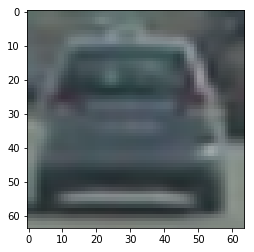

In [62]:
plt.imshow(img)
plt.show()

In [63]:
img[0][0]

array([ 0.36078432,  0.42745098,  0.40392157], dtype=float32)

In [127]:
new_ar = np.array([[1,2],[3,4]])
new_ar2 = np.array([[5,6],[7,8]])

In [128]:
print(new_ar)

[[1 2]
 [3 4]]


In [129]:
print(type(new_ar))

<class 'numpy.ndarray'>


In [130]:
random_list = []
random_list.append(new_ar)
random_list.append(new_ar2)

In [131]:
print(random_list)

[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]])]


In [132]:
print(len(random_list))

2


In [133]:
print(type(random_list))

<class 'list'>


In [134]:
print(random_list[-1])

[[5 6]
 [7 8]]


In [136]:
for box in random_list:
    print('box is', box)

box is [[1 2]
 [3 4]]
box is [[5 6]
 [7 8]]


In [137]:
new_list = random_list[-1]
for box in new_list:
    print('box is', box)

box is [5 6]
box is [7 8]


In [141]:
fin_list = [1,2,3]

In [147]:
print(fin_list[-2:])

[2, 3]


In [155]:
t_list = []
sup_array = [1,2,3,4]
t_list.append(sup_array)
t_list.append(sup_array)

In [156]:
print(len(t_list))

2


In [166]:
cboxes  = []
btm_l_array = np.array([10, 20])
top_r_array = np.array([30, 40])
box_array = np.array([btm_l_array, top_r_array])
cboxes.append(box_array)

for i in cboxes:
    print('i is now', i)

i is now [[10 20]
 [30 40]]


In [169]:
print(type(cboxes))

<class 'list'>


In [172]:
t_boxes = []
t_boxes.append(cboxes)
t_boxes.append(cboxes)

In [173]:
for h in t_boxes:
    print('h is now', h)

h is now [array([[10, 20],
       [30, 40]])]
h is now [array([[10, 20],
       [30, 40]])]


In [181]:
print(t_boxes)

[[array([[10, 20],
       [30, 40]])], [array([[10, 20],
       [30, 40]])]]
